In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import numpy as np

# Feature importance

### what features are important for my classification/regression problem?

## The mean decrease in impurity

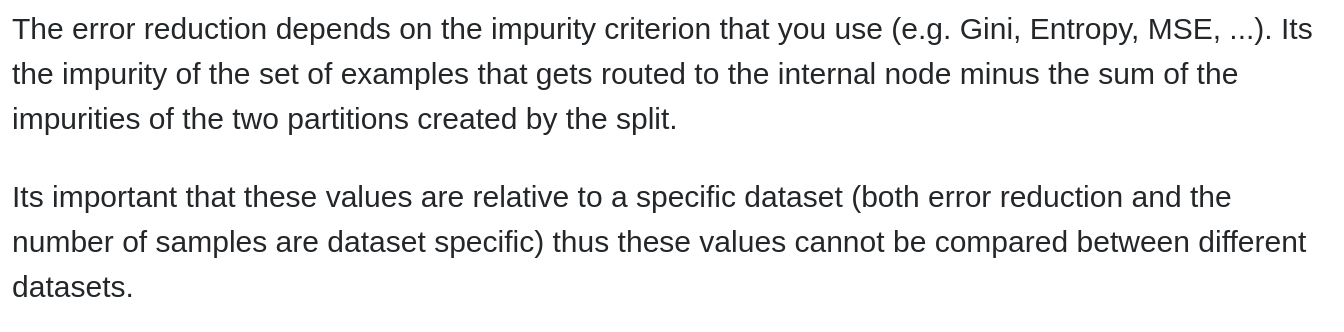

From https://stackoverflow.com/a/15820105


### How is my `clf.feature_importances_` calculated?

In [114]:
# Load some data:
digits = load_digits(n_class=2)
X,y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


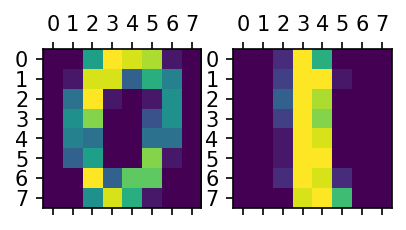

In [115]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(3,3))
ax1.matshow( X_train[10].reshape(8,8))
ax2.matshow( X_train[0].reshape(8,8))

In [116]:
# Fit a random forest classifier with super small trees:
clf = RandomForestClassifier(oob_score=True, max_depth=2, random_state=3141)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=3141)

In [5]:
# Extract a single tree from the forest
decision_tree = clf.estimators_[0]

In [6]:
# Store the first tree in t:
t = decision_tree.tree_

In [7]:
decision_tree.criterion

'gini'

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It reaches its minimum (zero) when all cases in the node fall into a single target category. 

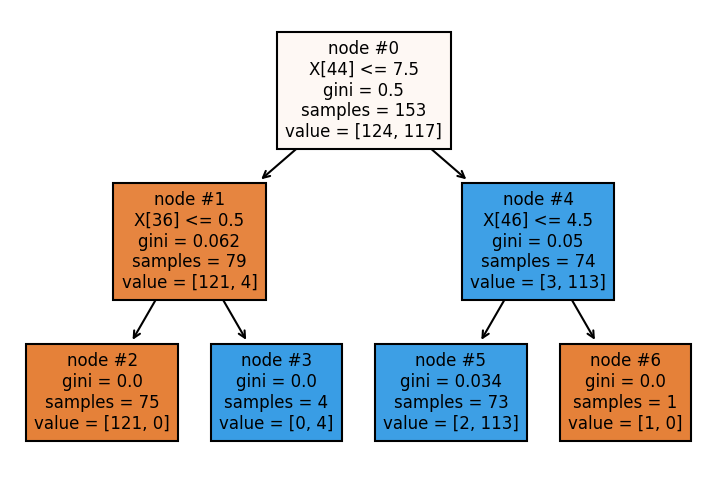

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plot_tree(decision_tree,impurity=True, fontsize=8,node_ids=True,filled=True)
pass

## Calculating feature importance for a single split

The value expresses how much the impurity is reduced by the split of the first node in the tree

In [9]:
decision_tree.tree_.impurity[0] # The first node contains all sampled training data: its not pure at all (~0.5)

0.49957817530689896

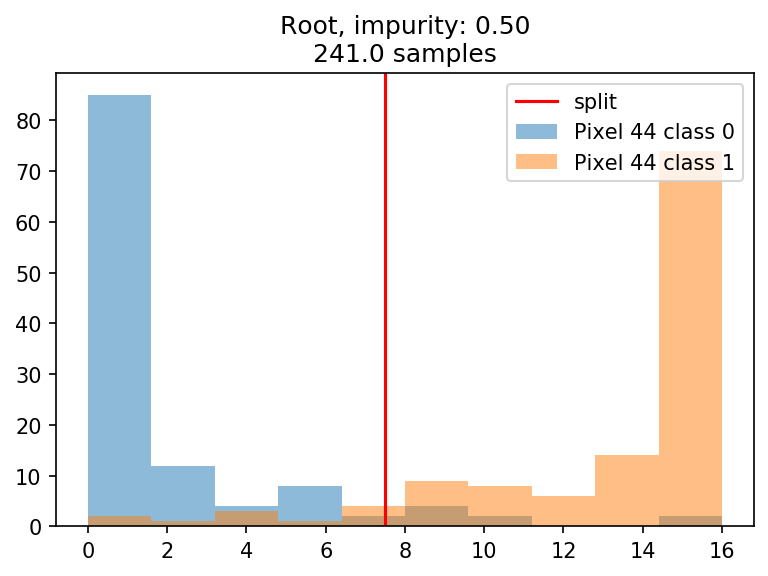

In [10]:
# The first split is based on feature 44
feature_index = decision_tree.tree_.feature[0] #<- in sklearn the feature selected per node is stored here

for class_id in clf.classes_:
    plt.hist(X_train[y_train==class_id,feature_index], label=f'Pixel {feature_index} class {class_id}', alpha=0.5)
plt.axvline(decision_tree.tree_.threshold[0], c='r', label='split')
plt.title(f'Root, impurity: {t.impurity[0]:.2f}\n{t.weighted_n_node_samples[0]} samples')
plt.legend()


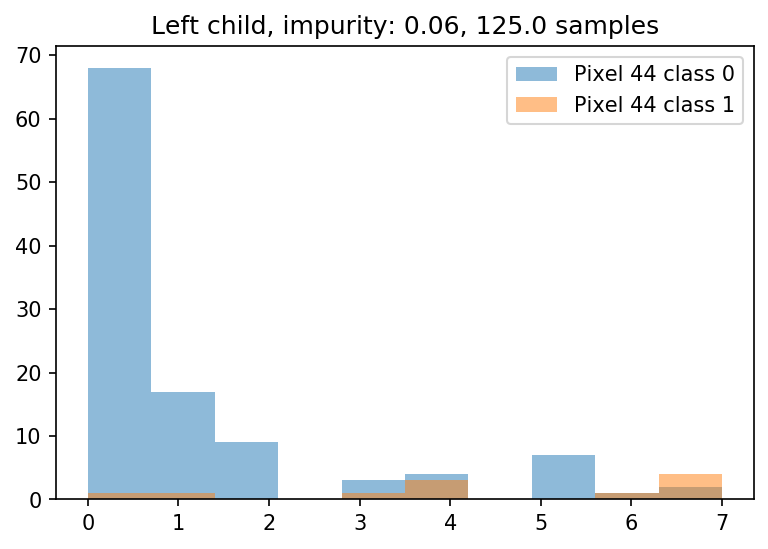

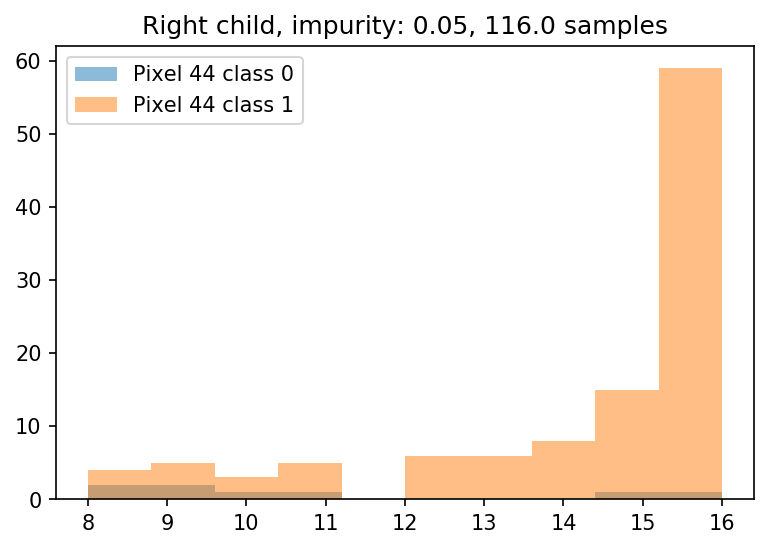

In [11]:
# After the split the two remaining nodes are much more pure:
remaining_indices = X_train[:,feature_index]<decision_tree.tree_.threshold[0]

for class_id in clf.classes_:
    plt.hist(X_train[(y_train==class_id)&remaining_indices,feature_index], label=f'Pixel {feature_index} class {class_id}', alpha=0.5)
    plt.legend()
    
n_samples_left = t.weighted_n_node_samples[t.children_left[0]]
plt.title(f'Left child, impurity: {t.impurity[t.children_left[0]]:.2f}, {n_samples_left} samples')
plt.show()

n_samples_right = t.weighted_n_node_samples[t.children_right[0]]
for class_id in clf.classes_:
    plt.hist(X_train[(y_train==class_id)&~remaining_indices,feature_index], label=f'Pixel {feature_index} class {class_id}', alpha=0.5)
    plt.legend()
plt.title(f'Right child, impurity: {t.impurity[t.children_right[0]]:.2f}, {n_samples_right} samples')
plt.show() 

## Calculation of feature importance, or how much impurity reduction by this split

In [24]:
decision_tree.

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=387812712)

In [12]:
idx = 0 # index of the root node
impurity= t.impurity # The impurity of the starting node
left_child = t.children_left[idx] 
right_child = t.children_right[idx]
node_samples = t.weighted_n_node_samples # The amount of samples each node has

# The impurity is 0.5, and there are 241 samples, we will make ~120 mistakes
impurity[idx]*node_samples[idx] 

120.39834024896265

In [13]:
# In the left child node the impurity is 0.06, and there are 125 samples, we will make ~7.7 mistakes
impurity[left_child]*node_samples[left_child] 

7.744000000000001

In [14]:
# In the right child node the impurity is 0.05, and there are 116 samples, we will make ~5.8 mistakes
impurity[right_child]*node_samples[right_child] 

5.844827586206897

In [15]:
# reduction in impurity:
impurity[idx]*node_samples[idx]- \
impurity[left_child]*node_samples[left_child]-\
impurity[right_child]*node_samples[right_child]# samples.

106.80951266275576

Normalizing this value, results in the weighted impurity decrease.

Normalize to the reduction in error per sample ( we started with t.weighted_n_node_samples ) 

In [16]:
106.80951266275576 / node_samples[idx]

0.4431929986006463

In [17]:
# This matches the result sklearn gives:
t.compute_feature_importances(normalize=False)[feature_index]

0.4431929986006463

## the feature importance depends on:
- amount of samples (amount of rows sampled from X)
- selected threshold (the classifier)
- the data in X : the reduction in impurity is based on the feature matrix

In [18]:
# For the complete tree, these importances are calculated for every split and then normalised to 1
t.compute_feature_importances(normalize=True)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06649042, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.9170725 ,
       0.        , 0.01643708, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

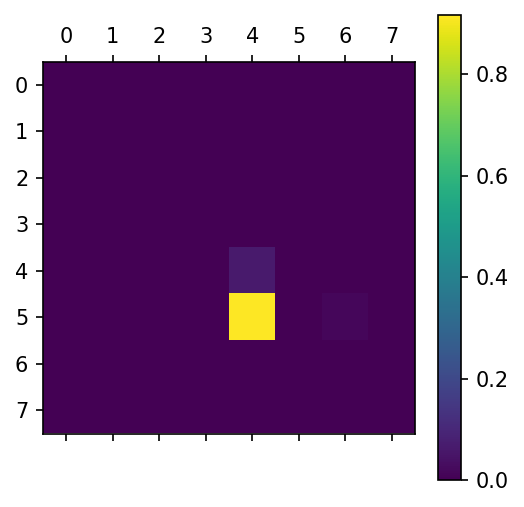

In [19]:
plt.matshow(t.compute_feature_importances().reshape(8,8))
plt.colorbar()

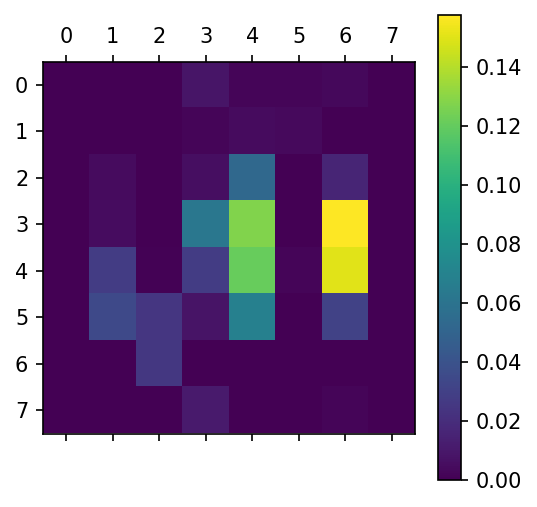

In [20]:
# Then for the complete forest, the mean value is calculated across all trees
plt.matshow(clf.feature_importances_.reshape(8,8))
plt.colorbar()

# Caveat
High cardinality random data gets a relatively high score

In [21]:
digits = load_digits(n_class=10)
X,y = digits.data, digits.target

In [22]:
# Add a bit of noise to make the classification a bit harder
X+=np.random.randint(-20,20,size=X.shape)

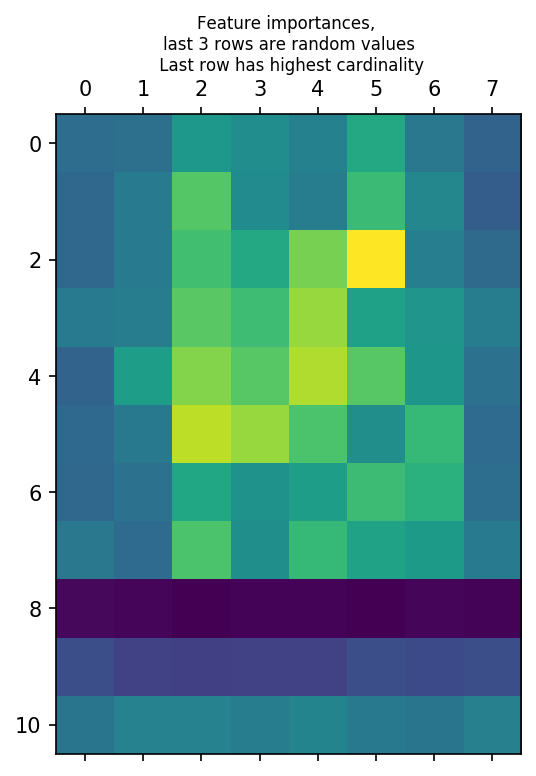

In [23]:
# Lets add some random data...
X_with_random = np.concatenate( [X,
                                 np.random.randint(0,2,size=(X.shape[0],8)), # Low cardinality
                                 np.random.randint(0,8,size=(X.shape[0],8)), # Med cardinality
                                 np.random.randint(0,10000,size=(X.shape[0],8) # High cardinality
                                                  
                                                  
                                                  )],axis=1 )

clf = RandomForestClassifier(oob_score=True)
clf.fit(X_with_random,y)

plt.matshow( clf.feature_importances_.reshape(8+3,8))
plt.title('Feature importances, \nlast 3 rows are random values\n Last row has highest cardinality',{'fontsize':8})
pass

Permutation feature importance, an alternative to calculate feature importance:

Impurity-based feature importance for trees are strongly biased and favor high cardinality features (typically numerical features) over low cardinality features such as binary features or categorical variables with a small number of possible categories.

Permutation-based feature importances do not exhibit such a bias. Additionally, the permutation feature importance may be computed performance metric on the model predictions predictions and can be used to analyze any model class (not just tree-based models).
    
https://scikit-learn.org/stable/modules/permutation_importance.html



# The code in sklearn to calculate the feature importance

https://github.com/scikit-learn/scikit-learn/blob/0fb307bf39bbdacd6ed713c00724f8f871d60370/sklearn/tree/_tree.pyx#L1052
    
```python    
    
cpdef compute_feature_importances(self, normalize=True):
    """Computes the importance of each feature (aka variable)."""
    cdef Node* left
    cdef Node* right
    cdef Node* nodes = self.nodes
    cdef Node* node = nodes
    cdef Node* end_node = node + self.node_count

    cdef double normalizer = 0.

    cdef np.ndarray[np.float64_t, ndim=1] importances
    importances = np.zeros((self.n_features,))
    cdef DOUBLE_t* importance_data = <DOUBLE_t*>importances.data

    with nogil:
        while node != end_node:
            if node.left_child != _TREE_LEAF:
                # ... and node.right_child != _TREE_LEAF:
                left = &nodes[node.left_child]
                right = &nodes[node.right_child]

                importance_data[node.feature] += (
                    node.weighted_n_node_samples * node.impurity -
                    left.weighted_n_node_samples * left.impurity -
                    right.weighted_n_node_samples * right.impurity)
            node += 1

    importances /= nodes[0].weighted_n_node_samples

    if normalize:
        normalizer = np.sum(importances)

        if normalizer > 0.0:
            # Avoid dividing by zero (e.g., when root is pure)
            importances /= normalizer

    return importances```